# Рунге для 1-ой гидравлической системы (3 уравнения)

In [1]:
import numpy as np
import math
size = 3            # размерность системы

In [2]:
# начальные данные
S_b = 0.0001   # квадратный сантиметр
p_a = 1e+5
p_b = p_a
S_a = S_b
m = 0.1   # 100 грамм
q = 1e-3
c = 1e-3

In [3]:
def fun(t, y):
    k = [0] * size
    k[0] = y[1]          # v
    k[1] = (p_b * S_b - y[2] * S_a) / m
    k[2] = (q + y[1] * S_a) / c
    return k

In [4]:
def Runge(t, y, h):  # t - значение узла, y - значения в точке t
    k = [[0] for _ in range(4)]
    y_temp = [0] * size
    y_result = [0] * size
    k[0] = fun(t, y)

    for i in range(size):
        y_temp[i] = y[i] + h / 2 * k[0][i]
    k[1] = fun(t + h / 2, y_temp)

    for i in range(size):
        y_temp[i] = y[i] + h / 2 * k[1][i]
    k[2] = fun(t + h / 2, y_temp)

    for i in range(size):
        y_temp[i] = y[i] + h * k[2][i]
    k[3] = fun(t + h, y_temp)

    for i in range(size):
        y_result[i] = y[i] + h * (k[0][i] + 2 * k[1][i] + 2 * k[2][i] + k[3][i]) / 6

    return y_result

In [5]:
def hydraulic(t_min, t_max, count):
    h = (t_max - t_min) / count
    t = [(t_max - t_min) * i / count for i in range(count + 1)]

    result = [[0, 0, p_a]]
    
    for i in range(count):
        result.append(Runge(t[i], result[i], h))
    return result, t, h

In [36]:
tmin = 0
tmax = 100
count = 1000
count2 = 2000
count3 = 4000

In [37]:
result, t, h = hydraulic(tmin, tmax, count)
result2, t2, h2 = hydraulic(tmin, tmax, count2)
result3, t3, h3 = hydraulic(tmin, tmax, count3)

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
# интерполяция для малой сетки
from scipy import interpolate

tck = interpolate.splrep(t, [result[i][1] for i in range(count + 1)])
#interpolate.splev(point, tck)

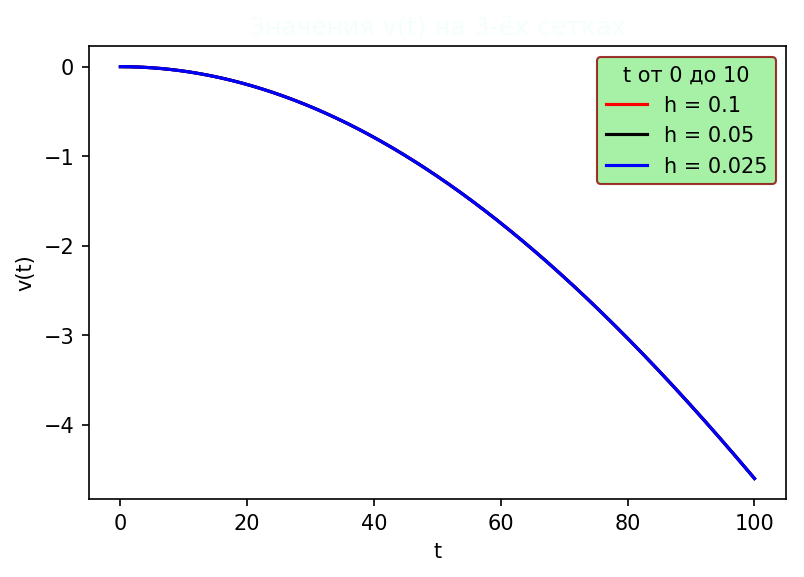

In [40]:
plt.subplots(dpi=150)
plt.title("Значения v(t) на 3-ёх сетках", color='mintcream')
plt.xlabel("t")
plt.ylabel("v(t)")
plt.plot(t, [result[i][1] for i in range(count + 1)], label='h = ' + str(h), color='r')
plt.plot(t2, [result2[i][1] for i in range(count2 + 1)], label='h = ' + str(h2), color='k')
plt.plot(t3, [result3[i][1] for i in range(count3 + 1)], label='h = ' + str(h3), color='b')
plt.legend(facecolor='lightgreen', edgecolor='darkred', title="t от 0 до 10")